# Week 7
# Geospatial Plotting with Folium

Folium is a Python wrapper for leaflet.js, a JavaScript library for creating interactive maps. Today we will learn how to use Folium to visualize geospatial data.

In [1]:
# install Folium
!pip install folium

In [2]:
import folium
import numpy as np
import pandas as pd
folium.__version__

'0.11.0'

In [3]:
# To create a base map, simply pass your starting coordinates to Folium:
m = folium.Map(location=[45.5236, -122.6750])

In [4]:
m

In [5]:
# Save it in a file.
import os
# create the folder if it is not exist 
print(os.getcwd()) # this shows current working directory
if not os.path.exists("saved"):
    print("Create the saved folder")
    os.mkdir("saved") # create the sub folder called saved 
m.save('saved/index.html') # save the above map in the folder

C:\Users\fadil\OneDrive\Desktop\Jupyter Notebook


The default tiles are set to `OpenStreetMap`, but `Stamen Terrain`, `Stamen Toner`, `Mapbox Bright`, and `Mapbox Control Room`, and many others tiles are built in.

In [6]:
folium.Map(
    location=[45.5236, -122.6750],
    tiles='Stamen Toner',
    zoom_start=13
)

In [7]:
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)

m

## Exercise
Create a map of New York City, and mark the location of the Statue of Liberty, Empire State Building, and Lehman College.

In [8]:
nyc = folium.Map(location=[40.71455, -74.00712])
folium.Marker([40.68925, -74.04456], popup="Status of Liberty", tooltip=tooltip).add_to(nyc)
folium.Marker([40.748463, -73.98567], popup="Empire State Building", tooltip=tooltip).add_to(nyc)
folium.Marker([40.87449, -73.893135], popup="Lehman College", tooltip=tooltip).add_to(nyc)
tooltip = 'Click me!'
nyc

Leaflet’s `Circle` and `CircleMarker`, implemented to reflect radii in units of meters and pixels respectively.

In [9]:
m = folium.Map(
    location=[45.5236, -122.6750],
    tiles='Stamen Toner',
    zoom_start=13
)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)


m

## Exercise
On the map of NYC, circle the airports.

In [10]:
nyc = folium.Map(location=[40.71455, -74.00712])
LGA = folium.Circle([40.7747222222, -73.8719444444], radius = 2500, popup = "LaGuardia Airport", color = "red").add_to(nyc)
JFK = folium.Circle([40.6438, -73.7823], radius = 2500, popup = "JFK Airport", color = "yellow").add_to(nyc)
EWR = folium.Circle([40.6895314, -74.17446239999998], radius = 2500).add_to(nyc)
nyc

## Choropleth Maps
A **choropleth map** is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable.

In [11]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json' # formatted string
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


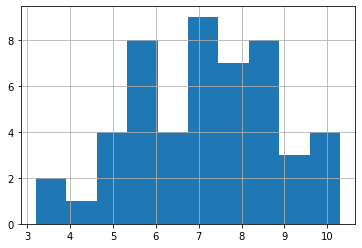

In [12]:
state_data["Unemployment"].hist()

In [13]:
state_data[state_data["State"]=="NY"]

,State,Unemployment
31,NY,8.4


In [14]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

## Exercise
Create a Choropleth map that indicate the size of population of each state.

In [15]:
# Load the population data
# https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv
url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv"
populations = pd.read_csv(url)
populations.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,10,0,0,0,United States,328239523,255200373,77.7
1,40,3,6,1,Alabama,4903185,3814879,77.8
2,40,4,9,2,Alaska,731545,551562,75.4
3,40,4,8,4,Arizona,7278717,5638481,77.5
4,40,3,7,5,Arkansas,3017804,2317649,76.8


In [16]:
populations = populations[["NAME","POPESTIMATE2019"]]
populations.head()

,NAME,POPESTIMATE2019
0,United States,328239523
1,Alabama,4903185
2,Alaska,731545
3,Arizona,7278717
4,Arkansas,3017804


In [17]:
populations = populations.drop([0])
populations.head()

,NAME,POPESTIMATE2019
1,Alabama,4903185
2,Alaska,731545
3,Arizona,7278717
4,Arkansas,3017804
5,California,39512223


In [18]:
populations.shape

(52, 2)

In [19]:
# Create the choropleth map
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=populations,
    columns=['NAME', 'POPESTIMATE2019'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population'
).add_to(m)

folium.LayerControl().add_to(m)

m

## Case Study: Visualize COVID Cases

COVID-19 is the most challenging crisis that humanity has faced since the second world war. Let's visualize how COVID-19 has impacted the world.

In [20]:
import requests
res = requests.get('https://api.thevirustracker.com/free-api?countryTotals=ALL')
covid_current = res.json()

In [21]:
covid_current['countryitems'][0]['1']

{'ourid': 1,
 'title': 'Afghanistan',
 'code': 'AF',
 'source': 'https://thevirustracker.com/afghanistan-coronavirus-information-af',
 'total_cases': 39994,
 'total_recovered': 33354,
 'total_unresolved': 0,
 'total_deaths': 1481,
 'total_new_cases_today': 66,
 'total_new_deaths_today': 1,
 'total_active_cases': 46,
 'total_serious_cases': 5159}

In [22]:
df = []
for j in range(1,len(covid_current['countryitems'][0])):
    df.append([covid_current['countryitems'][0]['{}'.format(j)]['title'],
               covid_current['countryitems'][0][f'{j}']['total_cases']])

In [23]:
df_covid = pd.DataFrame(df, columns = ['Country', 'Total Case'])

In [24]:
df_covid.head()

,Country,Total Case
0,Afghanistan,39994
1,Albania,15955
2,Algeria,53584
3,Angola,6680
4,Argentina,917035


In [25]:
df_covid[df_covid["Country"]=="Togo"]

,Country,Total Case
155,Togo,1972


In [26]:
df_covid.replace('USA', "United States of America", inplace = True)
df_covid.replace('Tanzania', "United Republic of Tanzania", inplace = True)
df_covid.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
df_covid.replace('Congo', "Republic of the Congo", inplace = True)
df_covid.replace('Lao', "Laos", inplace = True)
df_covid.replace('Syrian Arab Republic', "Syria", inplace = True)
df_covid.replace('Serbia', "Republic of Serbia", inplace = True)
df_covid.replace('Czechia', "Czech Republic", inplace = True)
df_covid.replace('UAE', "United Arab Emirates", inplace = True)

In [27]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [28]:
m = folium.Map()

folium.Choropleth(
   geo_data=country_shapes,
    name='choropleth',
    data=df_covid,
    columns=['Country', 'Total Case'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [31]:
# let load countries 
#https://www.kaggle.com/eidanch/counties-geographic-coordinates?select=countries.csv
url = 'https://www.kaggle.com/eidanch/counties-geographic-coordinates?select=countries.csv'
countries = pd.read_csv("countries.csv")
countries = countries.dropna()
countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [40]:
# Country coordinates
# https://www.kaggle.com/eidanch/counties-geographic-coordinates
countries = pd.read_csv('countries.csv')
countries = countries.dropna()
countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [41]:
for lat, lon, name in zip(countries['latitude'], countries['longitude'],countries['name']):
    folium.Marker(
    location=[lat, lon],
    popup=name
    ).add_to(m)

In [42]:
m